# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

Text(0,0.5,'Ratio')

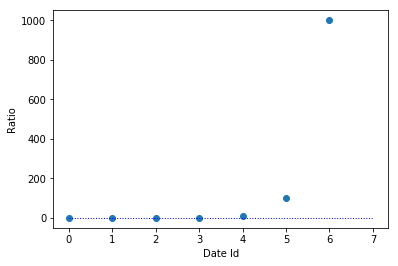

In [43]:
# Implement
plt.scatter(x=[i for i in range(len(list(x)))],y=ratio)
plt.hlines(y=1, xmin=0, xmax=len(x), linestyle = 'dotted', linewidth = 1, colors = "blue")
plt.xlabel("Date Id")
plt.ylabel("Ratio")

**Q: Explain what's bad about this plot.**

In [4]:
# Answer: this ratio should symmetric by the reference line, cause 1/10 = 0.1 
#and 10/1 = 10 makes so much difference. However, 10/1 or 1/10 means the same, this graph will make audiences a misleading.

**Q: Can you fix it? **

Text(0,0.5,'Ratio')

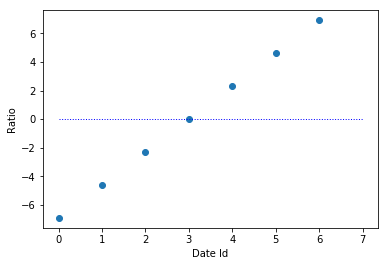

In [44]:
# Implement
## Using the LogSacle
plt.scatter(x=[i for i in range(len(list(x)))],y=np.log(ratio))
plt.hlines(y=np.log(1), xmin=0, xmax=len(x), linestyle = 'dotted', linewidth = 1, colors = "blue")
plt.xlabel("Date Id")
plt.ylabel("Ratio")

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [6]:
# Implement
movies = vega_datasets.data.movies()

In [7]:
movies = movies.dropna(subset=['IMDB_Rating', 'Rotten_Tomatoes_Rating', 'IMDB_Votes'])

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C2560E940>,
      dtype=object)

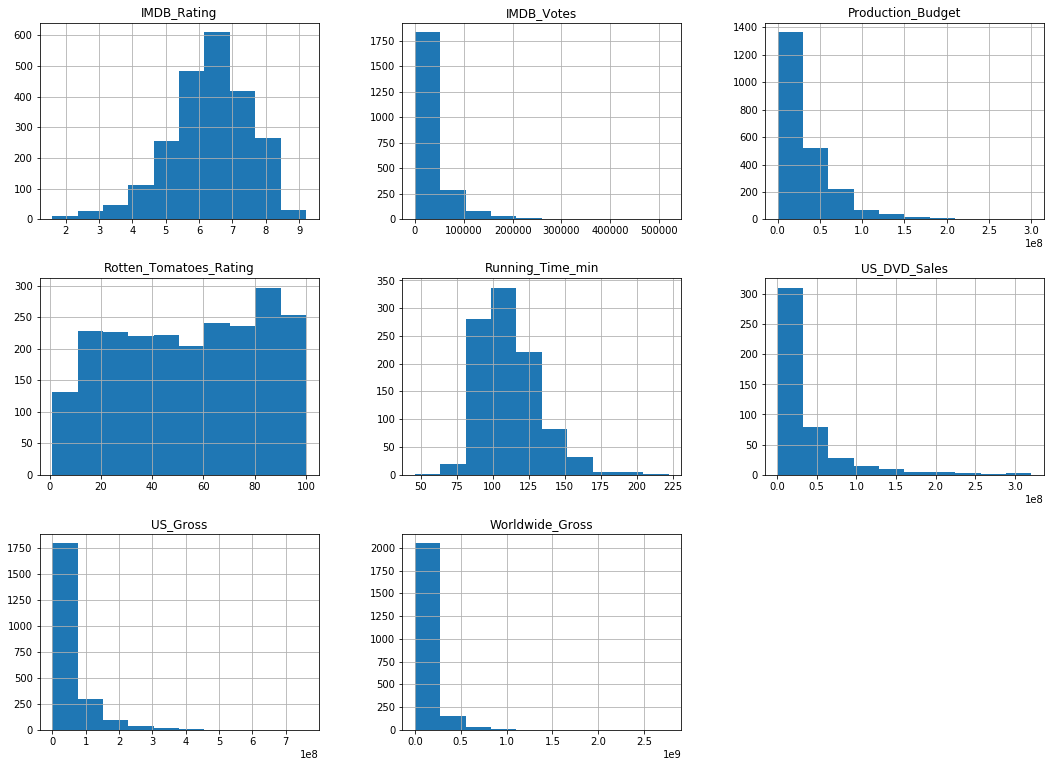

In [8]:
# Implement
movies.hist(figsize = (18,13))

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

Text(0,0.5,'Frequency')

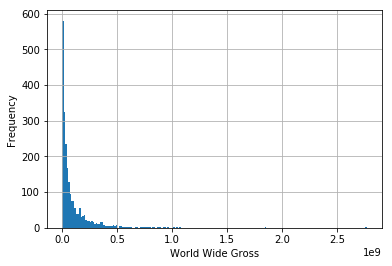

In [24]:
# Implement
movies.Worldwide_Gross.hist(bins = 200)
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

Text(0,0.5,'Frequency')

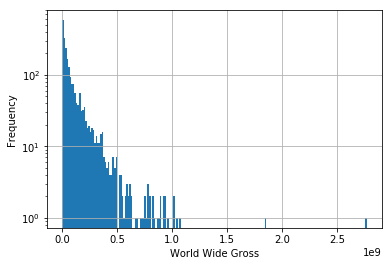

In [25]:
# Implement
movies.Worldwide_Gross.hist(bins = 200, log = True)
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


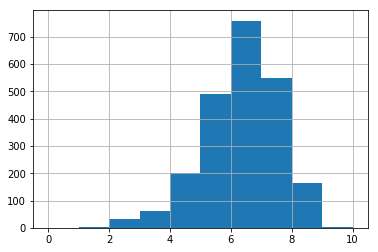

In [11]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [12]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [13]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [19]:
# Implement
bins = np.logspace(np.log10(min(movies.Worldwide_Gross)),np.log10(max(movies.Worldwide_Gross)),num = 20)
bins

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

Text(0,0.5,'Frequency')

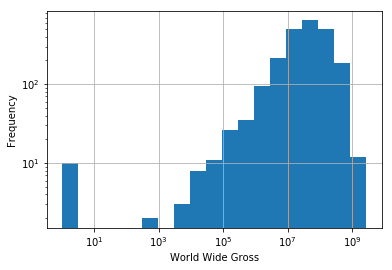

In [26]:
# Implement
movies.Worldwide_Gross.hist(bins = bins)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("World Wide Gross")
plt.ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

In [35]:
#Answer: No, it is no a right plot cause there are some empty bins in the graph.
## to fix the problem, we need to change the number of bins of the histogram

**Q: Can you explain the plot? Why are there gaps?**

In [36]:
##Answer: the gaps are caused by the number of bins, that some bins have no data points in the bin.

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

Text(0.5,0,'World Wide Gross')

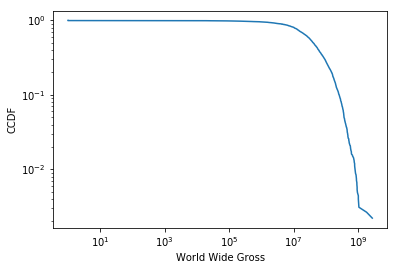

In [31]:
# implement 
data = movies.Worldwide_Gross
sorted_vals = np.sort(data)
ccdf = np.linspace(1, 1./len(data), len(data))
plt.plot(sorted_vals, ccdf)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('CCDF')
plt.xlabel('World Wide Gross')

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

Text(0.5,0,'World Wide Gross')

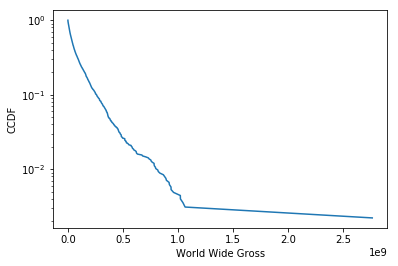

In [32]:
# Implement
data = movies.Worldwide_Gross
sorted_vals = np.sort(data)
ccdf = np.linspace(1, 1./len(data), len(data))
plt.plot(sorted_vals, ccdf)
plt.yscale('log')
plt.ylabel('CCDF')
plt.xlabel('World Wide Gross')

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [37]:
# Implement
# iloc is Purely integer-location based indexing for selection by position
# loc is Access a group of rows and columns by labels or a boolean array
movies.Worldwide_Gross.idxmax()

1234

In [39]:
# in this case, I will choose iloc[] because we already get the index number of the movies so it will be easy
# to use iloc to find the title of the movie
movies.Title.iloc[1234]

'Georgia Rule'